In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


/home/test/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/test/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/test/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any be

In [2]:
# Read the file named "pci_thesis_cleaned.csv" into a Pandas dataframe

# Drop S.N and save to new csv file


df = pd.read_csv('18-iri-final-adjusted.csv')
df.drop(['S.N'],axis=1,inplace=True)

# df.drop(159,axis=0,inplace=True)

df.replace({'.0.16': 0.16, '0..66': 0.66, '..45': 0.45},inplace=True)

df.dropna(axis=0, inplace=True)

# df.drop(df[df['AC3'] == '#VALUE!'].index[0], axis= 0, inplace=True)

df = df.astype(float)
print(f'any nan = {(np.any(np.isnan(df)))}')
print(f'all finite = {(np.all(np.isfinite(df)))}')


df.to_csv('18-iri-final-adjusted-cleaned.csv',index=False)
# Load the data set
df = pd.read_csv('18-iri-final-adjusted-cleaned.csv')

any nan = False
all finite = True


In [3]:
# Take a quick look at the dataset
df.head()

,AC1,AC2,AC3,BE1,BE2,BE3,D1,D2,D3,F1,F2,F3,G1,G2,G3,H1,H2,H3,IRI
0,0.00,0.0800,0.000,0.23,0.00,0.45,0.000,0.100,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,1.13
1,0.42,0.0600,0.560,0.12,0.46,0.15,0.000,0.620,0.00,0.0,0.0,0.0,0.0,0.05,0.00,0.00,0.00,0.0,3.75
2,0.00,0.6600,0.000,0.32,0.66,0.00,0.000,0.430,0.12,0.0,0.0,0.0,0.0,0.00,0.00,0.11,0.66,0.0,3.48
3,0.25,1.1906,0.662,0.00,0.15,0.32,0.021,0.216,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,2.85
4,0.00,0.0000,0.000,0.55,0.33,0.64,0.210,0.550,0.05,0.0,0.0,0.0,0.0,0.15,0.66,0.00,0.66,0.0,3.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC1     468 non-null    float64
 1   AC2     468 non-null    float64
 2   AC3     468 non-null    float64
 3   BE1     468 non-null    float64
 4   BE2     468 non-null    float64
 5   BE3     468 non-null    float64
 6   D1      468 non-null    float64
 7   D2      468 non-null    float64
 8   D3      468 non-null    float64
 9   F1      468 non-null    float64
 10  F2      468 non-null    float64
 11  F3      468 non-null    float64
 12  G1      468 non-null    float64
 13  G2      468 non-null    float64
 14  G3      468 non-null    float64
 15  H1      468 non-null    float64
 16  H2      468 non-null    float64
 17  H3      468 non-null    float64
 18  IRI     468 non-null    float64
dtypes: float64(19)
memory usage: 69.6 KB


In [5]:
df.describe()

,AC1,AC2,AC3,BE1,BE2,BE3,D1,D2,D3,F1,F2,F3,G1,G2,G3,H1,H2,H3,IRI
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,0.382184,0.643655,0.579623,0.149204,0.398508,0.429718,0.150204,0.261748,0.192490,0.025729,0.020385,0.019327,0.034991,0.060985,0.071606,0.053720,0.132165,0.075310,4.831410
std,0.501807,0.917657,0.871490,0.333221,0.637761,0.630314,0.265617,0.361254,0.346708,0.107221,0.068763,0.082544,0.130248,0.174526,0.195905,0.193746,0.424718,0.274987,2.345851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.560000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.047500
50%,0.200000,0.360000,0.320000,0.000000,0.120000,0.150000,0.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.620000
75%,0.600000,0.937250,0.815000,0.141250,0.600000,0.630000,0.210000,0.432500,0.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.122500
max,3.050000,11.970000,12.500000,2.400000,5.600000,4.560000,1.832600,2.600000,3.200000,1.200000,0.620000,1.010000,1.200000,1.620000,2.000000,2.220000,3.200000,3.080000,16.250000


#### Creation of Linear Regression Objects

In [6]:
# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)
X = df.drop(['IRI'],axis=1)

# Choose the response variable 'y' 
y = df.IRI



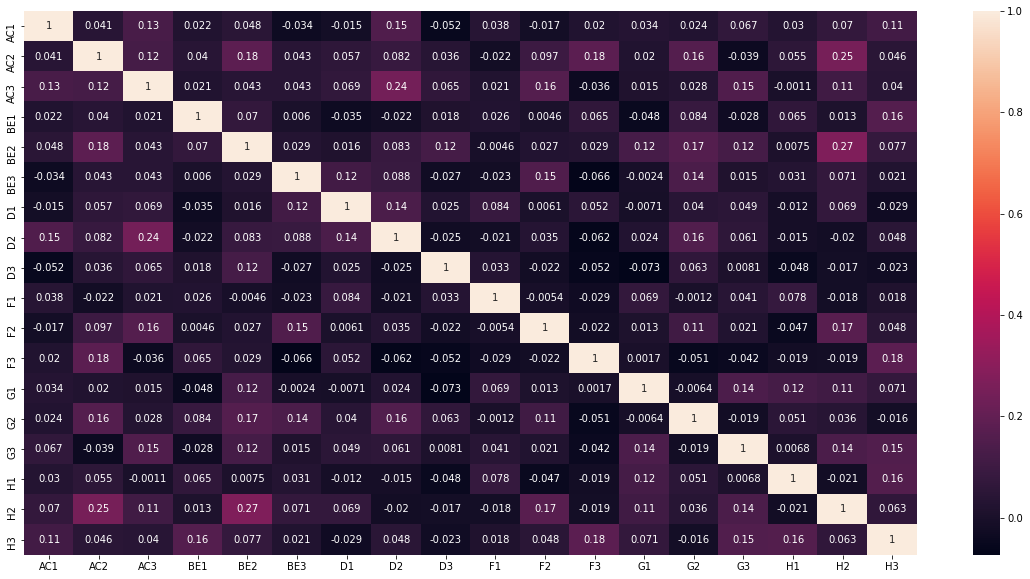

In [7]:
# Helper code to visualize the heatmap of the covariance matrix
corrMatrix = X.corr() 
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrMatrix, annot=True, ax=ax) 
plt.show()

In [8]:

# sns.pairplot(X)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=25)

In [10]:
# nan_index = []
# # Get index of nan values in all columns
# for column in df.columns:
#     nan_index.add( list(df[column].index[df[column].apply(np.isnan)]))
# nan_index

### Multi-Linear Regression using all variables

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.85, random_state=7)

# Perform multi-linear regression with all predictors
multi_linear = LinearRegression()

# Fit the multi-linear regression on all features of the entire data
multi_linear.fit(X_train,y_train)

# Get the coefficients (plural) of the model
multi_coef = multi_linear.coef_
# print(multi_coef)

print(f"test_r2 = {multi_linear.score(X_test,y_test)}")
print(f"train_r2 = {multi_linear.score(X_train,y_train)}")
# old
# test_r2 = 0.5156554784644096
# train_r2 = 0.5414078141853652

#old2 
# test_r2 = 0.5511890243343913
# train_r2 = 0.5343939208425568

test_r2 = 0.5434592656657656
train_r2 = 0.5992588634728352


In [20]:
table_actual_predicted = X_test.copy(deep=True)
table_actual_predicted['y_predicted'] = multi_linear.predict(X_test)
table_actual_predicted['y_true'] = y_test
table_actual_predicted.to_csv("18_testing_output_linear.csv",index=False )

#### Printing the individual $\beta$ values

In [ ]:
print(f"Coefficients: {multi_coef}")
print(f"Intercept: {multi_linear.intercept_}")



Coefficients: [ 0.53876218  0.18239464  0.57602153  0.3057779   0.11792859  0.50536171
  0.36815172  0.21063505  1.71210842  4.17466428  8.68326941 12.55232948
  0.22783763  0.34340966  1.88242326  0.27945421  0.30780979  0.57152044]
Intercept: 2.6026357028140295


line: y = 0.5214476584463417 * x + 2.248859238797725


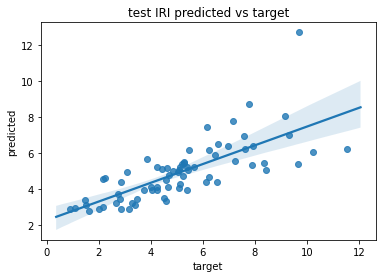

In [ ]:

x_test_prediction = multi_linear.predict(X_test)
ax = sns.regplot(x=y_test, y=x_test_prediction)
ax.set(title = 'test IRI predicted vs target', xlabel='target', ylabel='predicted')

import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print(f"line: y = {slope} * x + {intercept}")

line: y = 0.5992588634728355 * x + 1.913665104856924


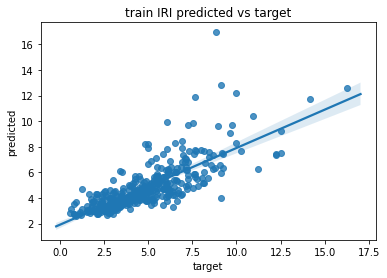

In [ ]:
x_train_prediction = multi_linear.predict(X_train)
ax = sns.regplot(x=y_train, y= x_train_prediction)
ax.set(title = 'train IRI predicted vs target', xlabel='target', ylabel='predicted')

import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print(f"line: y = {slope} * x + {intercept}")

In [ ]:
# Now using the stat

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.85, random_state=7)

# Assuming you have your data stored in X and y
# X should be a 2-dimensional array (or DataFrame) containing your features
# y should be a 1-dimensional array (or Series) containing your target

# Fit the linear regression model using sklearn
# sklearn_model = LinearRegression()
# sklearn_model.fit(X, y)

# Add a constant term to the features (intercept) for statsmodels
X_train_with_constant = sm.add_constant(X_train)

# Fit the linear regression model using statsmodels
statsmodel = sm.OLS(y_train, X_train_with_constant)
results = statsmodel.fit()

# Access the p-values for each coefficient
p_values = results.pvalues
pd.options.display.float_format = '{:.3f}'.format
greater_than_01 = p_values[p_values.index[p_values > 0.1]]
print(p_values)
print("\n\n p_values greater than 0.01")
print(greater_than_01)
count = greater_than_01.count()

filtered = filter(lambda x: x > 0.1 , p_values)
print((pd.Series(filtered)))
print(p_values)
results.summary()


const   0.000
AC1     0.001
AC2     0.042
AC3     0.000
BE1     0.203
BE2     0.361
BE3     0.000
D1      0.233
D2      0.377
D3      0.000
F1      0.000
F2      0.000
F3      0.000
G1      0.706
G2      0.458
G3      0.000
H1      0.483
H2      0.131
H3      0.113
dtype: float64


 p_values greater than 0.01
BE1   0.203
BE2   0.361
D1    0.233
D2    0.377
G1    0.706
G2    0.458
H1    0.483
H2    0.131
H3    0.113
dtype: float64
0   0.203
1   0.361
2   0.233
3   0.377
4   0.706
5   0.458
6   0.483
7   0.131
8   0.113
dtype: float64
const   0.000
AC1     0.001
AC2     0.042
AC3     0.000
BE1     0.203
BE2     0.361
BE3     0.000
D1      0.233
D2      0.377
D3      0.000
F1      0.000
F2      0.000
F3      0.000
G1      0.706
G2      0.458
G3      0.000
H1      0.483
H2      0.131
H3      0.113
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IRI   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     31.40
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           7.28e-64
Time:                        15:16:24   Log-Likelihood:                -719.55
No. Observations:                 397   AIC:                             1477.
Df Residuals:                     378   BIC:                             1553.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6026      0.150     17.326      0.000       2.307       2.898
AC1            0.5388      0.155      3.484      0.001       0.235       0.843
AC2            0.1824      0.089      2.039      0.042       0.006       0.358
AC3            0.5760      0.092      6.269      0.000       0.395       0.757
BE1            0.3058      0.240      1.276      0.203      -0.166       0.777
BE2            0.1179      0.129      0.914      0.361      -0.136       0.372
BE3            0.5054      0.132      3.820      0.000       0.245       0.766
D1             0.3682      0.308      1.195      0.233      -0.238       0.974
D2             0.2106      0.238      0.885      0.377      -0.257       0.679
D3             1.7121      0.225      7.593      0.000       1.269       2.155
F1             4.1747      0.701      5.954      0.000       2.796       5.553
F2             8.6833      1.200      7.233      0.000       6.323      11.044
F3            12.5523      0.930     13.504      0.000      10.725      14.380
G1             0.2278      0.603      0.378      0.706      -0.957       1.413
G2             0.3434      0.462      0.743      0.458      -0.565       1.252
G3             1.8824      0.417      4.519      0.000       1.063       2.702
H1             0.2795      0.398      0.702      0.483      -0.504       1.063
H2             0.3078      0.204      1.512      0.131      -0.092       0.708
H3             0.5715      0.360      1.587      0.113      -0.137       1.280
==============================================================================
Omnibus:                       32.127   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.031
Skew:                           0.034   Prob(JB):                     6.45e-31
Kurtosis:                       5.898   Cond. No.                         27.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:

z = pd.DataFrame({'AC1': [ 0.26],
 'AC2': [ 1.2],
 'AC3': [ 0.12],
 'BE1': [ 0.151],
 'BE2': [ 0.0],
 'BE3': [ 0.0],
 'D1': [ 0.0],
 'D2': [ 0.0],
 'D3': [ 0.0],
 'F1': [ 0.0],
 'F2': [ 0.0],
 'F3': [ 0.0],
 'G1': [ 0.0],
 'G2': [ 0.0],
 'G3': [ 0.0],
 'H1': [ 0.0],
 'H2': [ 0.0],
 'H3': [ 0.0]})
z = sm.add_constant(z, has_constant="add")
results.predict((z))

0   3.414
dtype: float64

In [ ]:

# # Initialize a list to store the beta values for each linear regression model
# linear_coef = []
# linear_score = []

# # Loop over all the predictors
# # In each loop "i" holds the name of the predictor 
# for i in X_train:
    
#     # Set the current predictor as the variable x_train
#     x_train = X_train[[i]]

#     # Create a linear regression object
#     linreg = LinearRegression()

#     # Fit the model with training data 
#     # Remember to choose only one column at a time i.e. given by x_train (not X_train)
#     linreg.fit(x_train,y_train)
    
#     # Add the coefficient value of the model to the list
#     linear_coef.append(linreg.coef_)
#     linear_score.append(linreg.score(X_test[[i]], y_test))
    
# linear_coef
# linear_score
